# Run CalicoST on prostate cancer dataset

# Download the data

We applied CalicoST on five slices in a prostate cross section from [Erickon et al.](https://www.nature.com/articles/s41586-022-05023-2) to study the cancer clones and spatial tumor evolution.

We provided the transcript count matrices from spaceranger output and the allele count matrices in [the google drive](https://drive.google.com/file/d/1eFH_rA6uyYwg1BttYsA3NNxgUALSc0UQ/view?usp=sharing), so that users can download and start running from there.

After downloading and untarring file, you will see the following files/directories
* tutorial
    * config.yaml
    * bamfile_list.tsv
    * config_estimate_tumorproportion
    * data
    * resources
    * snpinfo

# Estimate tumor proportion per spot

CalicoST can estimate tumor proportions based on the BAF signals. To estimate tumor proportions, run the following command in shell

```
cd tutorial
python <CalicoST code directory>/src/calicost/estimate_tumor_proportion.py -c config_estimate_tumorproportion
```

This command takes about 1 hour to run and will generate an output file of `estimate_tumor_prop/loh_estimator_tumor_prop.tsv`.

We load and visualize the estimated tumor proportions as follows.

In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import copy

In [2]:
tutorial_directory = "./"

tumor_proportions = pd.read_csv(f'{tutorial_directory}/estimate_tumor_prop/loh_estimator_tumor_prop.tsv', header=0, index_col=0, sep='\t')
tumor_proportions

,Tumor
BARCODES,
AAACAAGTATCTCCCA-1_H12,0.050000
AAACAGGGTCTATATT-1_H12,NaN
AAACATTTCCCGGATT-1_H12,0.120599
AAACCGGGTAGGTACC-1_H12,0.870529
AAACCGTTCGTCCAGG-1_H12,0.963482
...,...
TTGTTCAGTGTGCTAC-1_H25,0.050000
TTGTTGTGTGTCAAGA-1_H25,0.089673
TTGTTTCACATCCAGG-1_H25,0.981432


                    in_tissue  array_row  array_col  pxl_row_in_fullres  \
barcode                                                                   
ACGCCTGACACGCGCT-1          0          0          0                1466   
TACCGATCCAACACTT-1          0          1          1                1592   
ATTAAAGCGGACGAGC-1          0          0          2                1466   
GATAAGGGACGATTAG-1          0          1          3                1592   
GTGCAAATCACCAATA-1          0          0          4                1466   

                    pxl_col_in_fullres  
barcode                                 
ACGCCTGACACGCGCT-1                1298  
TACCGATCCAACACTT-1                1370  
ATTAAAGCGGACGAGC-1                1443  
GATAAGGGACGATTAG-1                1515  
GTGCAAATCACCAATA-1                1588  


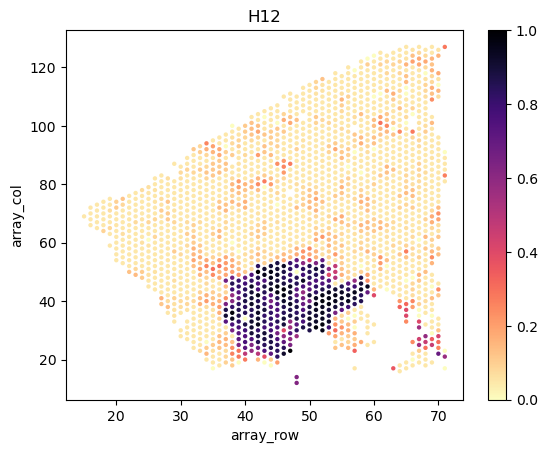

                    in_tissue  array_row  array_col  pxl_row_in_fullres  \
barcode                                                                   
ACGCCTGACACGCGCT-1          0          0          0                1831   
TACCGATCCAACACTT-1          0          1          1                1983   
ATTAAAGCGGACGAGC-1          0          0          2                1831   
GATAAGGGACGATTAG-1          0          1          3                1983   
GTGCAAATCACCAATA-1          0          0          4                1831   

                    pxl_col_in_fullres  
barcode                                 
ACGCCTGACACGCGCT-1                1544  
TACCGATCCAACACTT-1                1631  
ATTAAAGCGGACGAGC-1                1718  
GATAAGGGACGATTAG-1                1805  
GTGCAAATCACCAATA-1                1892  


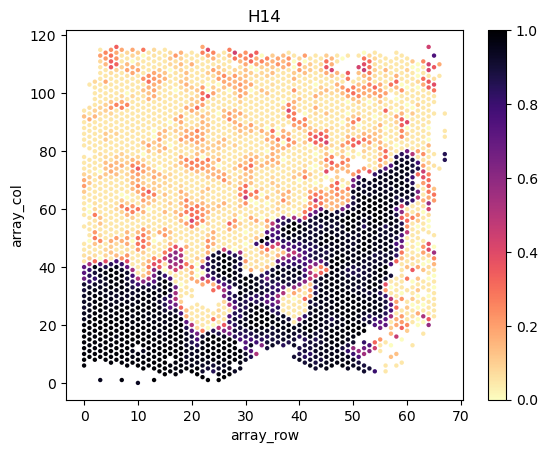

                    in_tissue  array_row  array_col  pxl_row_in_fullres  \
barcode                                                                   
ACGCCTGACACGCGCT-1          0          0          0                1593   
TACCGATCCAACACTT-1          0          1          1                1720   
ATTAAAGCGGACGAGC-1          0          0          2                1593   
GATAAGGGACGATTAG-1          0          1          3                1719   
GTGCAAATCACCAATA-1          0          0          4                1593   

                    pxl_col_in_fullres  
barcode                                 
ACGCCTGACACGCGCT-1                1172  
TACCGATCCAACACTT-1                1245  
ATTAAAGCGGACGAGC-1                1317  
GATAAGGGACGATTAG-1                1390  
GTGCAAATCACCAATA-1                1462  


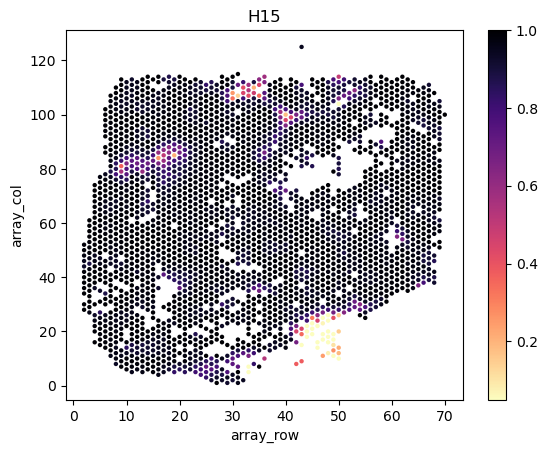

                    in_tissue  array_row  array_col  pxl_row_in_fullres  \
barcode                                                                   
ACGCCTGACACGCGCT-1          0          0          0                1830   
TACCGATCCAACACTT-1          0          1          1                1982   
ATTAAAGCGGACGAGC-1          0          0          2                1831   
GATAAGGGACGATTAG-1          0          1          3                1982   
GTGCAAATCACCAATA-1          0          0          4                1831   

                    pxl_col_in_fullres  
barcode                                 
ACGCCTGACACGCGCT-1                1523  
TACCGATCCAACACTT-1                1610  
ATTAAAGCGGACGAGC-1                1697  
GATAAGGGACGATTAG-1                1784  
GTGCAAATCACCAATA-1                1871  


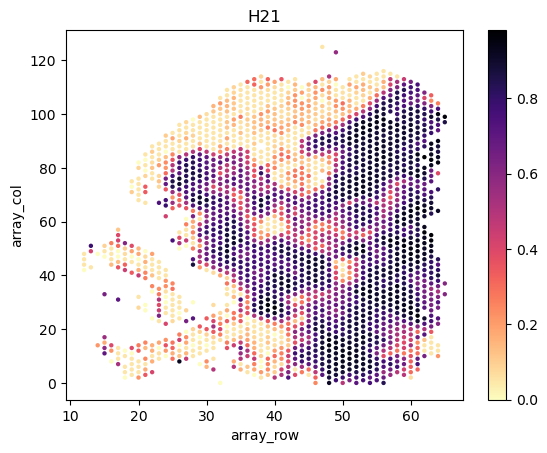

                    in_tissue  array_row  array_col  pxl_row_in_fullres  \
barcode                                                                   
ACGCCTGACACGCGCT-1          0          0          0                1948   
TACCGATCCAACACTT-1          0          1          1                2100   
ATTAAAGCGGACGAGC-1          0          0          2                1948   
GATAAGGGACGATTAG-1          0          1          3                2100   
GTGCAAATCACCAATA-1          0          0          4                1947   

                    pxl_col_in_fullres  
barcode                                 
ACGCCTGACACGCGCT-1                1441  
TACCGATCCAACACTT-1                1529  
ATTAAAGCGGACGAGC-1                1616  
GATAAGGGACGATTAG-1                1705  
GTGCAAATCACCAATA-1                1791  


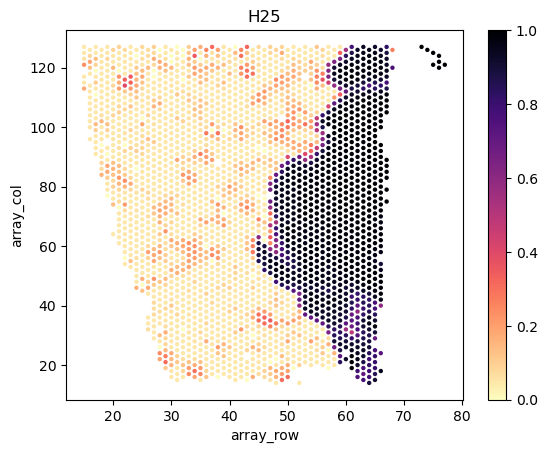

In [3]:
slice_ids = ['H12', 'H14', 'H15', 'H21', 'H25']
directory_name = ['P1_H1_2_visium', 'P1_H1_4_visium', 'P1_H1_5_visium', 'P1_H2_1_visium', 'P1_H2_5_visium']

for i,s in enumerate(slice_ids):
    # load spatial locations
    # note that scanpy is incompatible with the latest tissue_positions.csv file, we directly load the positions as pandas data frame
    df = pd.read_csv(f'{tutorial_directory}/data/{directory_name[i]}/spatial/tissue_positions.csv', header=0, index_col=0, sep=',')
    print(df.head())
    # combine the position data frame with the tumor proportion dataframe
    slice_tumor_proportions = tumor_proportions[tumor_proportions.index.str.endswith(s)]
    df = df.join( slice_tumor_proportions.rename(index=lambda x:x.split("_")[0]) )

    # plot
    fig, axes = plt.subplots(1, 1, facecolor='white')
    sns.scatterplot(x=df.array_row, y=df.array_col, hue=df.Tumor, palette='magma_r', linewidth=0, s=10, legend=False, ax=axes)
    norm = plt.Normalize(np.nanmin(df.Tumor.values), np.nanmax(df.Tumor.values))
    axes.figure.colorbar( plt.cm.ScalarMappable(cmap='magma_r', norm=norm), ax=axes )
    axes.set_title(s)
    plt.show()


# Run CalicoST to infer CNAs and cancer clones based on estimated tumor proportions

We run CalicoST using snakemake with the input file paths and CalicoST parameters are encoded in the `config.yaml` file (inside the tarball). Let's take a look at the key input/parameters.

The calicost_dir in `config.yaml` specifies the directory to CalicoST code. **You need to fill in this entry by yourself.**
```
calicost_dir:
```

The bamlist in `config.yaml` specifies a file list containing the paths and ids to all slices if we want to run CalicoST on multiple slices jointly. This file is already included in the tar ball.
```
bamlist: "bamfile_list.tsv"
```

The output_snpinfo specifies the path to the allele count matrices, which is already included in the tarball under the `snpinfo` directory.
```
output_snpinfo: "snpinfo"
```

The tumorprop_file specifies the path to the estimated tumor proportions per spot, which is the output of the previous "Estimate tumor proportion per spot" section.
```
tumorprop_file: "estimate_tumor_prop/loh_estimator_tumor_prop.tsv"
```

The random_state specifies a list of random seeds to initialization the HMRF in CalicoST. The following example shows a list of five random seeds, and therefore CalicoST will be run five times with the corresponding random initialization.
```
random_state: [0, 1, 2, 3, 4]
```

The n_states parameter of CalicoST specifies the number of copy number states to infer using HMM.
```
n_states: 7
```

The n_clones parameter of CalicoST specifies the number of clones to initialize when considering BAF signals only. The final number of clones will not be this number, but instead the number of refined clones considering both expression and BAF signals that cannot be merged after comparing the pairwise CNA similarity among clones.
```
n_clones: 5
```

Now we run CalicoST using snakemake by running the following command in shell.

```
snakemake --cores <number cores> --configfile config.yaml --snakefile <CalicoST code directory>/calicost.smk
```

### Visualize CalicoST-generated plots

Once CalicoST is finished running, it generates several plots for each random initialization. We now visualize the PDFs in this notebook for the first random initialization as an example.

In [14]:
from IPython.display import HTML

# cancer clones in space
HTML(f'<iframe src={tutorial_directory}/calicost/clone5_rectangle0_w1.0/plots/clone_spatial.pdf width=1200 height=350></iframe>')


In [15]:
# allele-specific copy numbers of each clone (the color scheme is the same as Fig2c
HTML(f'<iframe src={tutorial_directory}/calicost/clone5_rectangle0_w1.0/plots/acn_genome.pdf width=1200 height=450></iframe>')


In [16]:
# RDR-BAF plot along the genome for each clone
HTML(f'<iframe src={tutorial_directory}/calicost/clone5_rectangle0_w1.0/plots/rdr_baf_defaultcolor.pdf width=1000 height=800></iframe>')


### Load CalicoST-generated result tables

Clone labels for each spot: Note that under heterogeneous spot assumption, the inferred cancer clone label is not very meaningful if the tumor proportion of that spot is too low, and the RDR and BAF signals of the tumor are to faint to accurately indicate which clone the spot contains.

In [17]:
df = pd.read_csv(f"{tutorial_directory}/calicost/clone5_rectangle0_w1.0/clone_labels.tsv", header=0, index_col=0, sep='\t')
df

,clone_label,tumor_proportion
BARCODES,,
AAACAAGTATCTCCCA-1_H12,5,0.050000
AAACAGGGTCTATATT-1_H12,5,NaN
AAACATTTCCCGGATT-1_H12,5,0.120599
AAACCGGGTAGGTACC-1_H12,5,0.870529
AAACCGTTCGTCCAGG-1_H12,5,0.963482
...,...,...
TTGTTCAGTGTGCTAC-1_H25,1,0.050000
TTGTTGTGTGTCAAGA-1_H25,1,0.089673
TTGTTTCACATCCAGG-1_H25,2,0.981432


Allele-specific copy numbers of each genome segment: Each row is a genome segment with its chromosome, start, and end position, along with the A allele count and B allele count per cancer clone.

In [19]:
df = pd.read_csv(f"{tutorial_directory}/calicost/clone5_rectangle0_w1.0/cnv_seglevel.tsv", header=0, index_col=None, sep='\t')
df

,CHR,START,END,clone1 A,clone1 B,clone2 A,clone2 B,clone3 A,clone3 B,clone4 A,clone4 B,clone5 A,clone5 B
0,1,89295,1419136,1,1,1,1,1,1,1,1,1,1
1,1,1434861,1440568,1,1,1,1,1,1,1,1,1,1
2,1,1449689,1496123,1,1,1,1,1,1,1,1,1,1
3,1,1512162,1721078,1,1,1,1,1,1,1,1,1,1
4,1,1724838,2308568,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2261,22,46360834,48898361,1,1,1,1,1,1,1,1,1,1
2262,22,49773283,49963978,1,1,1,1,1,1,1,1,1,1
2263,22,50089879,50180213,1,1,1,1,1,1,1,1,1,1
2264,22,50185915,50323572,1,1,1,1,1,1,1,1,1,1


Allele-specific copy number per gene: projecting the allele-specific copy numbers per genome segment to the spanned genes within each segment such that the genes have enough expression in this transcript count matrix.

In [20]:
df = pd.read_csv(f"{tutorial_directory}/calicost/clone5_rectangle0_w1.0/cnv_genelevel.tsv", header=0, index_col=None, sep='\t')
df

,gene,clone1 A,clone1 B,clone2 A,clone2 B,clone3 A,clone3 B,clone4 A,clone4 B,clone5 A,clone5 B
0,A2M,1,1,1,1,1,1,1,1,1,1
1,A2M-AS1,1,1,1,1,1,1,1,1,1,1
2,A2ML1,1,1,1,1,1,1,1,1,1,1
3,A4GALT,1,1,1,1,1,1,1,1,1,1
4,AAAS,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
14983,ZXDC,1,1,1,1,1,1,1,1,1,1
14984,ZYG11A,1,1,1,1,1,1,1,1,1,1
14985,ZYG11B,1,1,1,1,1,1,1,1,1,1
14986,ZYX,1,1,1,1,1,1,1,1,1,1


# Reconstruct tumor phylogeny and phylogeography

We use an existing phylogeny reconstruction method, [Startle](https://github.com/raphael-group/startle) by [Sashittal et al](https://linkinghub.elsevier.com/retrieve/pii/S2405471223003289), to infer a phylogeny of CalicoST-inferred cancer clones. To reconstruct a phylogeny based CalicoST results of the first random initialization, run the following command in shell:
```
mkdir calicost/phylogeny_clone5_rectangle0_w1.0
python <CalicoST code directory>/src/calicost/phylogeny_startle.py -c calicost/clone5_rectangle0_w1.0 -s <startle executable path> -o calicost/phylogeny_clone5_rectangle0_w1.0/
```

The above run of Startle will produce a plain-text file `calicost/phylogeny_clone5_rectangle0_w1.0/loh_tree.newick` that encodes phylogeny tree with leaf nodes as CalicoST-inferred clones. We load the tree file as follows.

In [4]:
with open(f"{tutorial_directory}/calicost/phylogeny_clone5_rectangle0_w1.0/loh_tree.newick", 'r') as fp:
    print( fp.readlines() )

['((clone1:3,clone2:0):4,((clone3:3,clone4:3):8,clone5:0):2);']


Now we project the phylogenetic tree in space to get a phylogeography. Before getting the phylogeography, we note that we currently don't have the relative positioning among the five slices yet. We manually place the five slices according to Fig 1b in the original publication by [Erickon et al.](https://www.nature.com/articles/s41586-022-05023-2), and transform the x/y coordinate in the `tissue_positions.csv` file according to the new positioning.

In [4]:
# load coordinates and inferred cancer clones
coords = []
for i,s in enumerate(slice_ids):
    # load spatial locations
    # note that scanpy is incompatible with the latest tissue_positions.csv file, we directly load the positions as pandas data frame
    df = pd.read_csv(f'{tutorial_directory}/data/{directory_name[i]}/spatial/tissue_positions.csv', header=0, index_col=0, sep=',')
    df.index = df.index + "_" + s
    df['slice_id'] = s
    coords.append( df )

coords = pd.concat(coords)

# combine with the cancer clone table
df = pd.read_csv(f"{tutorial_directory}/calicost/clone5_rectangle0_w1.0/clone_labels.tsv", header=0, index_col=0, sep='\t')
df.clone_label = 'clone' + df.clone_label.astype(str)
coords = coords.join(df)

# remove spots that are not assigned to clones by CalicoST (filtered out due to low UMI count or SNP-covering UMI count)
coords = coords[coords.clone_label.notnull()]
coords

,in_tissue,array_row,array_col,pxl_row_in_fullres,pxl_col_in_fullres,slice_id,clone_label,tumor_proportion
barcode,,,,,,,,
TCCTTCAGTGGTCGAA-1_H12,1,15,69,3366,6308,H12,clone5,0.05
GCGTCGAAATGTCGGT-1_H12,1,17,65,3618,6018,H12,clone5,0.05
AACTGATATTAGGCCT-1_H12,1,16,66,3492,6090,H12,clone5,0.05
CGAGCTGGGCTTTAGG-1_H12,1,17,67,3618,6163,H12,clone5,0.05
GGGTGTTTCAGCTATG-1_H12,1,16,68,3492,6236,H12,clone5,0.05
...,...,...,...,...,...,...,...,...
ATGGCCCGAAAGGTTA-1_H25,1,76,120,13480,12001,H25,clone1,1.00
CGTAATATGGCCCTTG-1_H25,1,77,121,13632,12089,H25,clone1,1.00
AGAGTCTTAATGAAAG-1_H25,1,76,122,13480,12176,H25,clone1,1.00


In [5]:
def flip_axis(coords, axis):
    max_x = np.max(coords[:,axis])
    min_x = np.min(coords[:,axis])
    tmp_coords = copy.copy(coords)
    tmp_coords[:,axis] = min_x + max_x - coords[:,axis]
    return tmp_coords


def rotate_by_angle(coords, angle):
    theta = angle / 180 * np.pi
    R = np.array([ [np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]] )
    mean_coords = np.mean(coords, axis=0)
    return (coords - mean_coords.reshape(1,-1)) @ R + mean_coords.reshape(1,-1)

In [6]:
adjusted_coords = copy.copy(coords[['array_row', 'array_col']].values)
# scale y coordinate so that the hexagon is not squeezed on one direction
adjusted_coords[:,0] = adjusted_coords[:,0] * np.sqrt(3)
# shift x and y coordinate to start from 0 for each slice
for s,sname in enumerate(slice_ids):
    index = np.where(coords.slice_id.values == sname)[0]
    adjusted_coords[index,0] -= np.min(adjusted_coords[index,0])
    adjusted_coords[index,1] -= np.min(adjusted_coords[index,1])
    

# position in number of cubes
cube_length = min( np.max(adjusted_coords[:,0]), np.max(adjusted_coords[:,1]) )
sample_cube_pos = np.array([ [2,0], #H12
                             [4, 0.2], #H14
                             [5,0.5], #H15
                             [0,1], #H21
                             [5,1.5] ]) #H25

swap_x_y = [False, True, True, False, True]
rotation_angle = [15,-5,-5,0,-5] # H12, H14, H15, H21, H25

full_adj_coords = np.zeros(adjusted_coords.shape)
for s,sname in enumerate(slice_ids):
    index = np.where(coords.slice_id.values == sname)[0]
    if swap_x_y[s]:
        tmp_coords = np.vstack([adjusted_coords[index,1],adjusted_coords[index,0]]).T
        if sname != "H25":
            tmp_coords = flip_axis(tmp_coords, axis=0 )
        tmp_coords = flip_axis(tmp_coords, axis=1)
        full_adj_coords[index,:] = tmp_coords + cube_length * sample_cube_pos[s]
    else:
        full_adj_coords[index,:] = adjusted_coords[index,:] + cube_length * sample_cube_pos[s]
        
    full_adj_coords[index,:] = rotate_by_angle(full_adj_coords[index,:], rotation_angle[s])

coords['final_x'] = full_adj_coords[:,0]
coords['final_y'] = full_adj_coords[:,1]
coords

,in_tissue,array_row,array_col,pxl_row_in_fullres,pxl_col_in_fullres,slice_id,clone_label,tumor_proportion,final_x,final_y
barcode,,,,,,,,,,
TCCTTCAGTGGTCGAA-1_H12,1,15,69,3366,6308,H12,clone5,0.05,238.421578,74.056744
GCGTCGAAATGTCGGT-1_H12,1,17,65,3618,6018,H12,clone5,0.05,241.250005,69.157764
AACTGATATTAGGCCT-1_H12,1,16,66,3492,6090,H12,clone5,0.05,239.576972,70.641328
CGAGCTGGGCTTTAGG-1_H12,1,17,67,3618,6163,H12,clone5,0.05,241.767643,71.089616
GGGTGTTTCAGCTATG-1_H12,1,16,68,3492,6236,H12,clone5,0.05,240.094611,72.573180
...,...,...,...,...,...,...,...,...,...,...
ATGGCCCGAAAGGTTA-1_H25,1,76,120,13480,12001,H25,clone1,1.00,700.743576,183.088412
CGTAATATGGCCCTTG-1_H25,1,77,121,13632,12089,H25,clone1,1.00,701.914082,181.183178
AGAGTCTTAATGAAAG-1_H25,1,76,122,13480,12176,H25,clone1,1.00,702.735965,183.262723


/Users/congma/Documents/Codes/CalicoST/src/calicost/utils_plotting.py:1404: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  quantile_colors = this_full_cmap(np.array([0, np.min(copy_single_tumor_prop[idx]), np.max(copy_single_tumor_prop[idx]), 1]))
/Users/congma/Documents/Codes/CalicoST/src/calicost/utils_plotting.py:1407: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  seaborn.scatterplot(x=shifted_coords[idx,0], y=-shifted_coords[idx,1], s=10, hue=copy_single_tumor_prop[idx], palette=this_cmap, linewidth=0, legend=None, ax=axes)
/Users/congma/Documents/Codes/CalicoST/src/calicost/utils_plotting.py:1404: FutureWarning: 

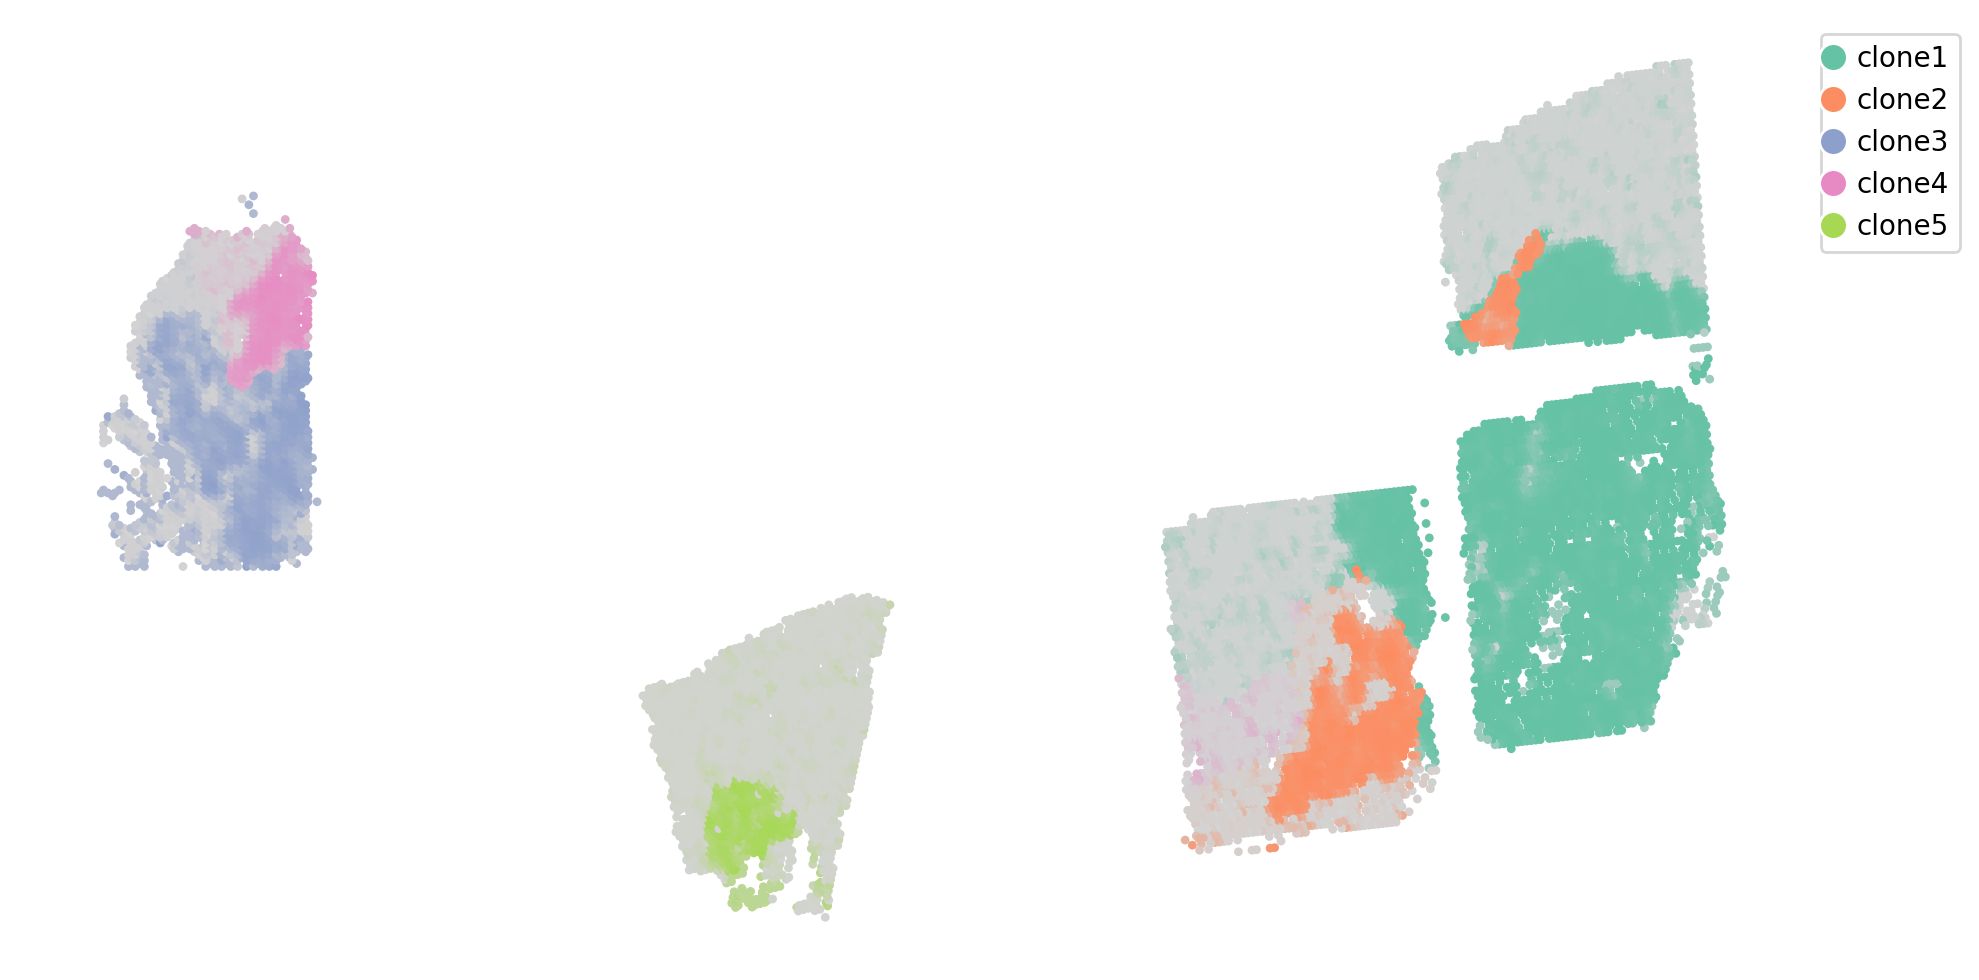

In [7]:
import calicost.utils_plotting

fig = calicost.utils_plotting.plot_individual_spots_in_space(full_adj_coords, coords.clone_label, coords.tumor_proportion, base_width=10, base_height=5)
plt.gca().invert_yaxis()
fig.show()

Now we project the phylogeny to the space of coords[['final_x', 'final_y']] and infer ancestor locations using a Gaussian diffusion model.

In [8]:
import calicost.phylogeography

newick_file = f"{tutorial_directory}/calicost/phylogeny_clone5_rectangle0_w1.0/loh_tree.newick"
t = calicost.phylogeography.project_phylogeneny_space(newick_file, coords[['final_x', 'final_y']].values, coords.clone_label.values, 
                              single_tumor_prop=coords.tumor_proportion.values, sample_list=slice_ids, sample_ids=coords.slice_id.values)

print( t )

root node is ancestor1_2_3_4_5
a list of leaf nodes: ['clone1', 'clone2', 'clone5', 'clone3', 'clone4']
a list of internal nodes: ['ancestor1_2_3_4_5', 'ancestor1_2', 'ancestor3_4_5', 'ancestor3_4']
                 x           y
clone                         
clone1  651.494110  121.626402
clone2  550.327676   64.464511
clone3   62.692785  159.421751
clone4   76.548595  204.733559
clone5  283.986948   30.709794

      /-clone1
   /-|
  |   \-clone2
--|
  |      /-clone3
  |   /-|
   \-|   \-clone4
     |
      \-clone5


/Users/congma/Documents/Codes/CalicoST/src/calicost/utils_plotting.py:1404: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  quantile_colors = this_full_cmap(np.array([0, np.min(copy_single_tumor_prop[idx]), np.max(copy_single_tumor_prop[idx]), 1]))
/Users/congma/Documents/Codes/CalicoST/src/calicost/utils_plotting.py:1407: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  seaborn.scatterplot(x=shifted_coords[idx,0], y=-shifted_coords[idx,1], s=10, hue=copy_single_tumor_prop[idx], palette=this_cmap, linewidth=0, legend=None, ax=axes)
/Users/congma/Documents/Codes/CalicoST/src/calicost/utils_plotting.py:1404: FutureWarning: 

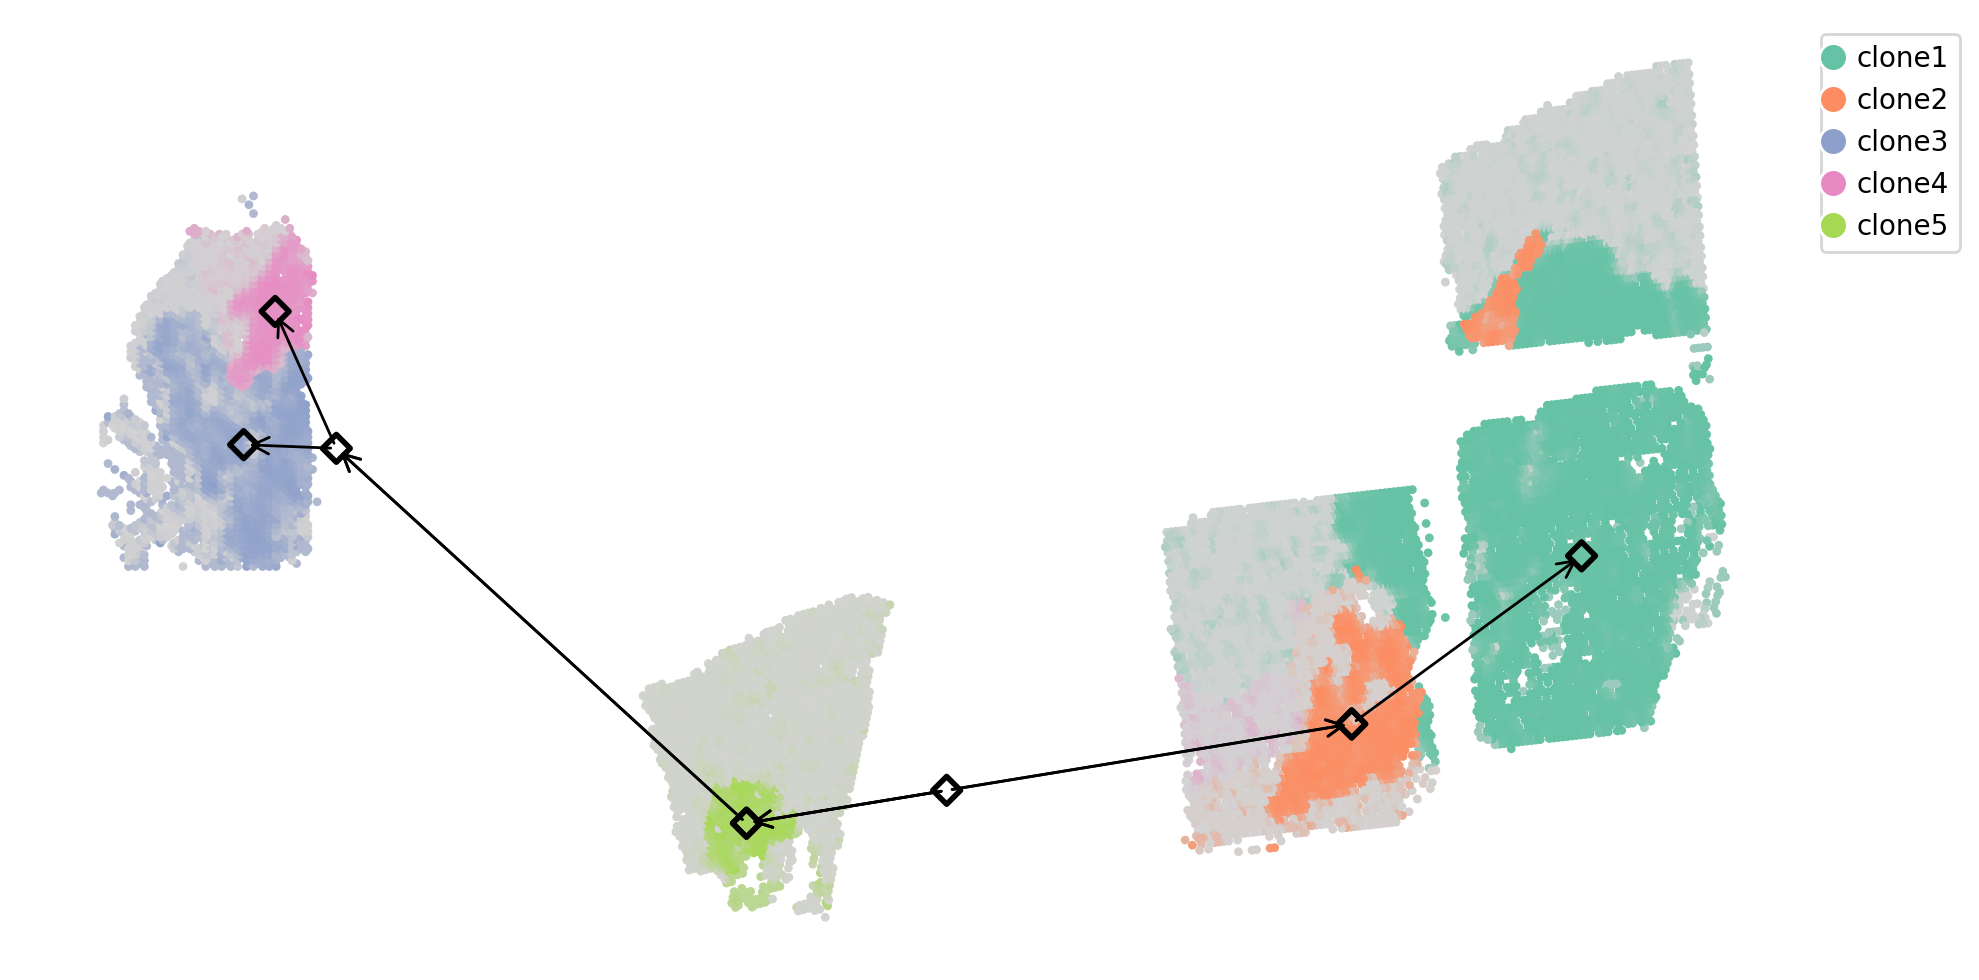

In [9]:
# plot clones in space with the phylogeography

fig = calicost.utils_plotting.plot_individual_spots_in_space(full_adj_coords, coords.clone_label, coords.tumor_proportion, base_width=10, base_height=5)
axes = plt.gca()

# clone centers + ancestors
for node in t.traverse():
    axes.scatter( node.x, -node.y, marker="D", linewidth=2, edgecolor='black', facecolor="None", s=50)

# edges
for node in t.iter_leaves():
    while not node.is_root():
        p = node.up
        if np.abs(node.x - p.x) + np.abs(node.y - p.y) > 1:
            axes.annotate("", xy=(node.x, -node.y), xytext=(p.x, -p.y), arrowprops=dict(mutation_scale=15, lw=1, arrowstyle="->", color="black"))
        node = p
        
axes.invert_yaxis()
fig.show()